In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Objective: 
**Make a model to predict the app rating, with other information about the app provided.**

# Problem Statement:

**Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.**

In [279]:
#Load the data file using pandas. 
google_play = pd.read_csv('googleplaystore.csv')

In [280]:
google_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [281]:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Analysis to be done: 
**The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.**

In [282]:
#Check for null values in the data. Get the number of null values for each column.
google_play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [283]:
google_play = google_play.dropna()

In [284]:
#Size column has sizes in Kb as well as Mb. To analyze, we will need to convert these to numeric.
google_play['Size'] = google_play['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
google_play['Size'] = google_play['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
google_play['Size'] = google_play['Size'].apply(lambda x: float(str(x).replace('M', '')) * 1024 if 'M' in str(x) else x)
google_play['Size'] = google_play['Size'].apply(lambda x: float(x))

In [285]:
#Drop NaN from Size.
google_play = google_play.dropna()

In [286]:
#Convert Reviews to numeric
google_play['Reviews'] = google_play['Reviews'].apply(lambda x: int(x))
print(google_play['Reviews'].dtypes)

int64


In [287]:
#remove ‘+’, ‘,’ from the field, convert it to integer
google_play['Installs'] = google_play['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
google_play['Installs'] = google_play['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
google_play['Installs'] = google_play['Installs'].apply(lambda x: int(x))
print(google_play['Installs'].dtypes)

int64


In [288]:
#Remove ‘$’ sign, and convert Price to numeric
google_play['Price'] = google_play['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_play['Price'] = google_play['Price'].apply(lambda x: float(x))
print(google_play['Price'].dtypes)

float64


In [289]:
#Drop rating that have a value outside 1-5 range.
google_play = google_play[(google_play.Rating >0) | (google_play.Rating<=5)]

In [290]:
#Reviews should not be more than installs as only those who installed can review the app.
google_play = google_play[google_play.Installs>=google_play.Reviews]

In [326]:
#For free apps (type = “Free”), the price should not be >0.
google_play[(google_play.Type == 'Free') & (google_play.Price>0)]
# there are no records

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [292]:
paid_apps = google_play[google_play.Price>0]

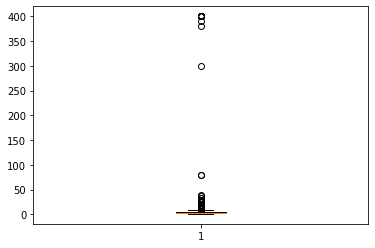

In [293]:
# Boxplot for Price
plt.boxplot(paid_apps.loc[:,'Price'])
#plt.ylim([0,200])
plt.show()
#outliers are somewhere after 200

C:\Users\d_abu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

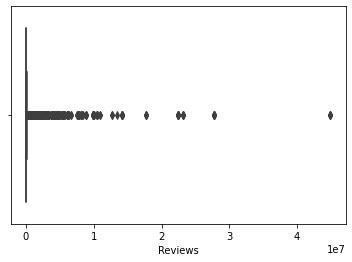

In [294]:
#Boxplot for Reviews
sns.boxplot(google_play.Reviews)
#there aren't any apps with very high number of reviews,the values don't seem to be right?
#will do more analysis to see how reviews are distributed 

<AxesSubplot:xlabel='Rating', ylabel='Count'>

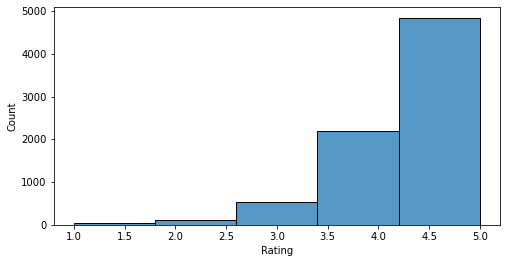

In [295]:
#Histogram for Rating
plt.figure(figsize=(8,4))
sns.histplot(data=google_play['Rating'],bins=5)
#ratings are distributed more toward higher ratings.

<AxesSubplot:xlabel='Size', ylabel='Count'>

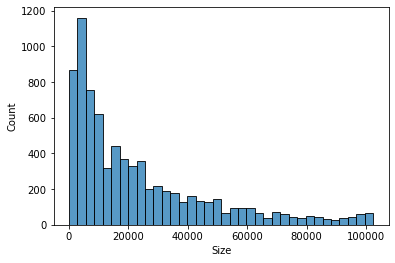

In [296]:
##Histogram for Size
sns.histplot(google_play.Size)

# Outlier treatment


In [297]:
#Price: From the box plot, it seems like there are some apps with very high price. 
#A price of $200 for an application on the Play Store is very high and suspicious!
#Drop apps with price more than 200 as most seem to be junk apps
google_play=google_play[google_play['Price']<=200]

In [298]:
#Reviews: Very few apps have very high number of reviews. 
#These are all star apps that don’t help with the analysis and, in fact, will skew it. 
#Drop records having more than 2 million reviews.
google_play=google_play[google_play['Reviews']<=2000000]

In [299]:
#Installs:There seems to be some outliers in this field too. 
#Apps having very high number of installs should be dropped from the analysis.
#Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
print(np.percentile(google_play.Installs,[10,25,50,70,90,95,99]))

[1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+07 5.e+07]


In [300]:
#Decide 95 percentaile to be as cutoff for outlier and drop records having values more than that.
google_play=google_play[google_play.Installs<= np.percentile(google_play.Installs,95)]

# Bivariate analysis
**Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating.we are going to make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features**

<Figure size 2000x1000 with 0 Axes>

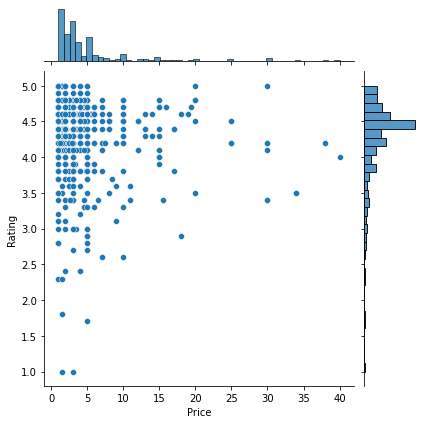

In [301]:
#joinplot for Rating vs. Price
plt.figure(figsize=(10,5),dpi=200)
sns.jointplot(x=google_play[(google_play['Type']=="Paid") & (google_play['Price']<50)]['Price'], 
              y=google_play[(google_play['Type']=="Paid") & (google_play['Price']<50)]['Rating'])

In [302]:
google_play['Rating'].corr(google_play['Price'])
#we notice that price and rating are not correlated

0.02489677456024226

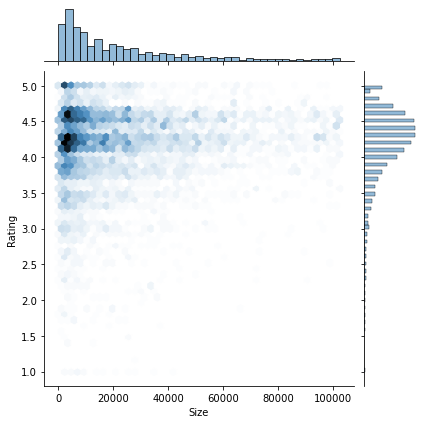

In [303]:
#scatter plot for Rating vs. Size
sns.jointplot(x=google_play['Size'],y=google_play['Rating'],kind="hex", color="#6EA3CC")
#we notice that price and Size are not realy correlated
#heavier apps are not rated better

In [304]:
google_play['Rating'].corr(google_play['Size'])

0.06232761379390585

Text(0, 0.5, 'Rating')

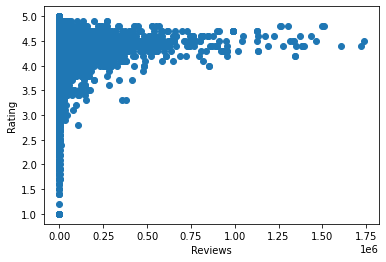

In [305]:
#scatter plot for Rating vs. Reviews
plt.scatter(y=google_play['Rating'],x=google_play['Reviews'])
plt.xlabel('Reviews')
plt.ylabel('Rating')

In [306]:
google_play['Rating'].corr(google_play['Reviews'])
#Reviews and Ratings are weakly correlated 
# it seems like apps with high number of reviews are most likly to get a better rating.

0.14313426246992308

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

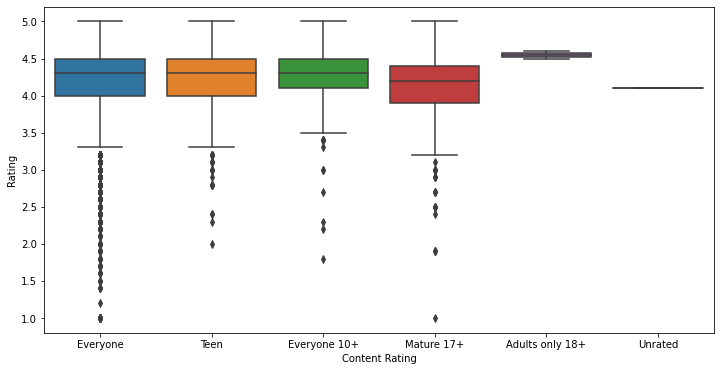

In [307]:
#boxplot for Rating vs. Content Rating
plt.figure(figsize=(12,6))
sns.boxplot(y='Rating',x='Content Rating',data=google_play)
#Adults only 18+ has slightly butter rating average than other Content types

In [308]:
google_play.groupby('Content Rating').mean()['Rating']

Content Rating
Adults only 18+    4.550000
Everyone           4.158108
Everyone 10+       4.222711
Mature 17+         4.089916
Teen               4.210318
Unrated            4.100000
Name: Rating, dtype: float64

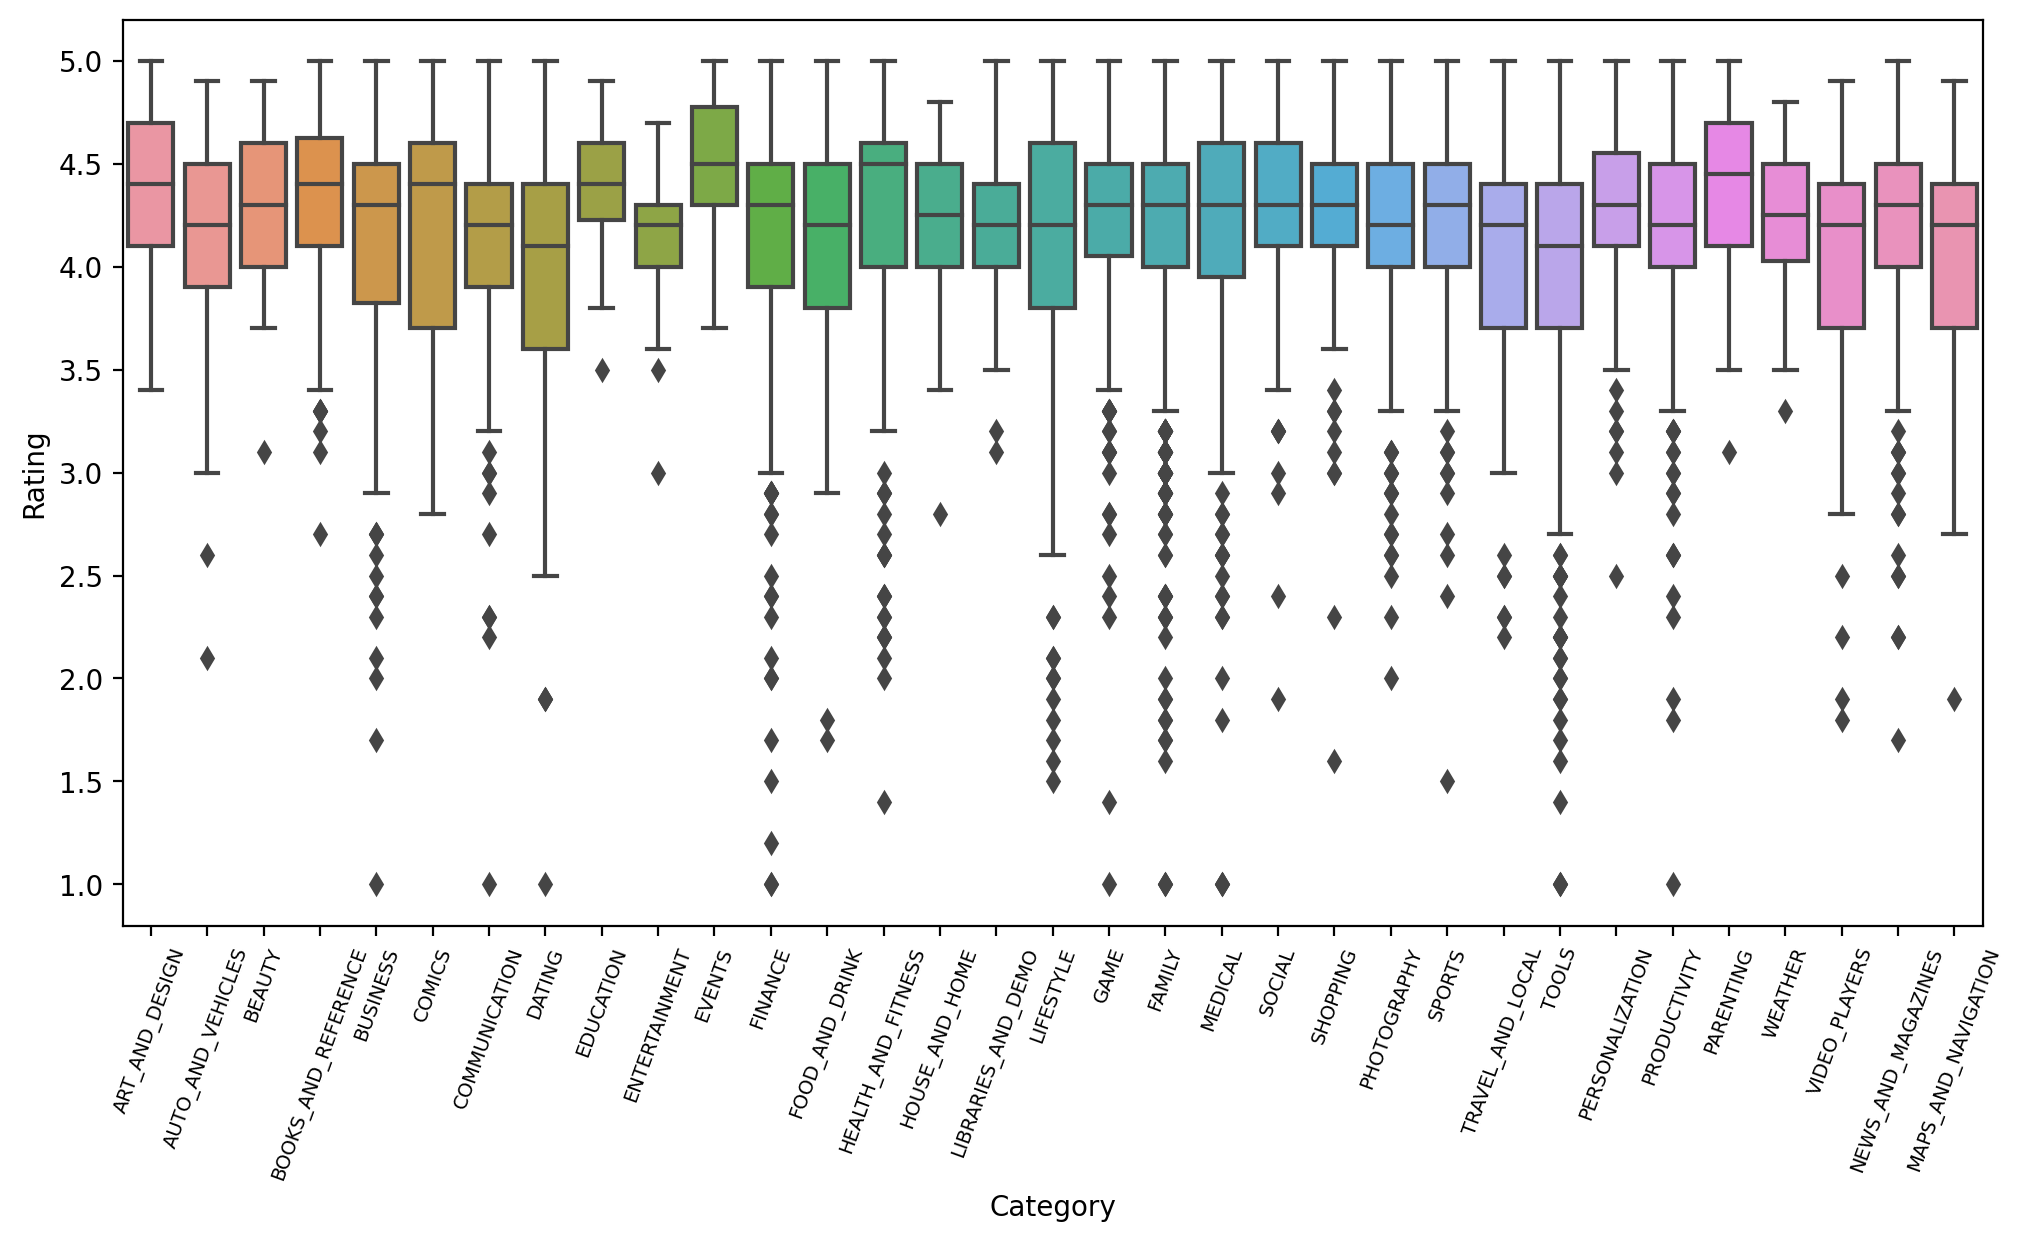

In [309]:
#boxplot for Ratings vs. Category
plt.figure(figsize=(12,6),dpi=200)
sns.boxplot(y='Rating',x='Category',data=google_play)
plt.xticks(rotation=70,fontsize=7)
plt.show()
#EVENTS genra has the best rating.

In [310]:
google_play.groupby('Category').mean()['Rating'].nlargest()

Category
EVENTS                 4.478947
EDUCATION              4.387273
ART_AND_DESIGN         4.378947
PARENTING              4.347727
BOOKS_AND_REFERENCE    4.320139
Name: Rating, dtype: float64

# Data preprocessing
- For the steps below,we will create a copy of the dataframe to make all the edits.

- 'Reviews' and 'Install' have some values that are still relatively very high. Before building a linear regression model, we will   need to reduce the skew. 

- Drop columns 'App', 'Last Updated', 'Current Ver', and 'Android Ver'. These variables are not useful for our task.

- Get dummy columns for 'Category', 'Genres', and 'Content Rating'. This needs to be done as the models do not understand categorical data, and all data should be numeric.

In [311]:
inp1=google_play.copy() #create a copy

In [312]:
#Apply log transformation (np.log1p) to Reviews and Installs to reduce skewness.
inp1['Reviews']= np.log1p(inp1.Reviews)
inp1['Installs']= np.log1p(inp1.Installs)

In [313]:
#Drop unusefull columns fro out task
inp1= inp1.drop(['App', 'Last Updated','Current Ver','Android Ver'], axis=1)

In [314]:
#convert character fields to numeric using dummy incoding
inp2 = pd.get_dummies(inp1,prefix_sep='_',columns=['Type','Category', 'Genres', 'Content Rating'])
inp2.iloc[0:100,:]

,Rating,Reviews,Size,Installs,Price,Type_Free,Type_Paid,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19456.0,9.210440,0.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14336.0,13.122365,0.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8908.8,15.424949,0.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2867.2,11.512935,0.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5734.4,10.819798,0.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,4.5,3.610918,6860.8,9.210440,0.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
112,4.1,5.236442,30720.0,10.819798,0.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
114,4.2,3.433987,2969.6,9.210440,0.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
115,4.5,4.905275,17408.0,9.210440,0.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# Multiple Linear regssion Model building

In [315]:
y = inp2['Rating']
x= inp2.iloc[:,1:]
# Train and test split(70-30)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.30)

In [316]:
from sklearn.linear_model import LinearRegression  #import linear regression

In [317]:
model_inp2 = LinearRegression().fit(x_train,y_train) #bulding model
predictions_Rating = model_inp2.predict(x_test) ## Making predictions

In [318]:
google_test_combined = pd.concat([x_test.reset_index(drop=True),
                                   y_test.reset_index(drop=True),
                                   pd.DataFrame(predictions_Rating,columns=['Predicted_Rating'])],axis=1)
#combin and reset indexes f x_test,y_test,and predicted ratings in one datafram
google_test_combined.Predicted_Rating = round(google_test_combined.Predicted_Rating,1)
google_test_combined

,Reviews,Size,Installs,Price,Type_Free,Type_Paid,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating,Predicted_Rating
0,6.484635,12288.0,11.512935,0.0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,4.1,4.4
1,5.948035,2355.2,10.819798,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4.1,3.9
2,6.285998,10240.0,9.210440,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,3.9,4.2
3,5.648974,5120.0,11.512935,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4.2,3.8
4,7.748460,6041.6,10.819798,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4.7,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2.890372,15360.0,6.908755,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3.6,4.2
2189,4.795791,5222.4,9.210440,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4.7,4.4
2190,11.636770,36864.0,15.424949,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,3.5,4.3
2191,5.899897,2355.2,11.512935,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,3.1,3.8


In [319]:
#calculate error pct
google_test_combined['Err_pct'] = abs(google_test_combined.Rating - 
                                      google_test_combined.Predicted_Rating)/google_test_combined.Rating

In [320]:
# Error Rate
google_test_combined['Err_pct'].mean()

0.10173882844730575

In [321]:
# Accuracy Rate
1- google_test_combined['Err_pct'].mean()

0.8982611715526942

In [322]:
from sklearn.metrics import r2_score #import R2

In [323]:
r2_score(google_test_combined.Rating,google_test_combined.Predicted_Rating) # r2_score

0.13379933116829412